In [1]:
from tensor import Tensor
from linear import Linear
from cross_entropy_loss import CELossWithLogits
import numpy as np
import torch
from sequential import Sequential
from relu import ReLU
from sgd import SGD
import matplotlib.pyplot as plt

In [2]:
X = Tensor(np.array([
    [0, 0.0],
    [0, 1],
    [1, 0],
    [1, 1]
]))

# left = 0, right = 1 
y_true = Tensor(np.array([
    [1, 0],
    [0, 1],
    [0, 1],
    [1, 0]
]))

nn = Sequential(
    Linear(2, 8),
    ReLU(),
    Linear(8, 2)
)

In [44]:
sgd = SGD(nn.get_params(), lr=1e-4)
criterion = CELossWithLogits()

In [45]:

n_epochs = 10_000

for epoch_idx in range(n_epochs):

    logits = nn.forward(X)

    loss = criterion.forward(logits, y_true)

    sgd.zero_grad()

    print(f"Loss = {loss.value}")

    loss.backward()

    sgd.step()

Loss = 0.02245259633239995
Loss = 0.022452510819961337
Loss = 0.022452433750510044
Loss = 0.02245235829165608
Loss = 0.02245228283365439
Loss = 0.022452210886583633
Loss = 0.02245215473435854
Loss = 0.02245209049767549
Loss = 0.02245203452768543
Loss = 0.022451980815176246
Loss = 0.022451925793469683
Loss = 0.02245187184955149
Loss = 0.022451815279098775
Loss = 0.022451760825126392
Loss = 0.0224517040799528
Loss = 0.022451655106913673
Loss = 0.022451594987076117
Loss = 0.022451546019348876
Loss = 0.02245148660780142
Loss = 0.022451435771146347
Loss = 0.022451376012603535
Loss = 0.02245132410869724
Loss = 0.02245126621898604
Loss = 0.022451214507266868
Loss = 0.022451156693613104
Loss = 0.022451103343146317
Loss = 0.022451046539483835
Loss = 0.022450992896609977
Loss = 0.022450937994157823
Loss = 0.02245088353819552
Loss = 0.022450835990924803
Loss = 0.022450785045577702
Loss = 0.022450731121783425
Loss = 0.022450673389251864
Loss = 0.022450621436734708
Loss = 0.02245057142805184
Loss =

In [5]:
def softmax(x: np.ndarray):
    ex = np.exp(x)
    return ex / np.sum(ex, axis=1, keepdims=True)

In [51]:
def plot_decision_boundary(nn, n_points_per_dim):

    decision_values = np.zeros((n_points_per_dim, n_points_per_dim), dtype=float)

    for j, x in enumerate(np.linspace(0, 1, n_points_per_dim)):
        for i, y in enumerate(np.linspace(0, 1, n_points_per_dim)):

            point = Tensor(np.array([[x, y]]))

            logits = nn.forward(point)

            probs = softmax(logits.value)
            
            prob_for_one = probs[0, 0]

            decision_values[i, j] = prob_for_one
    
    
    plt.imshow(decision_values, extent=(0, 1, 0, 1))
    plt.show()

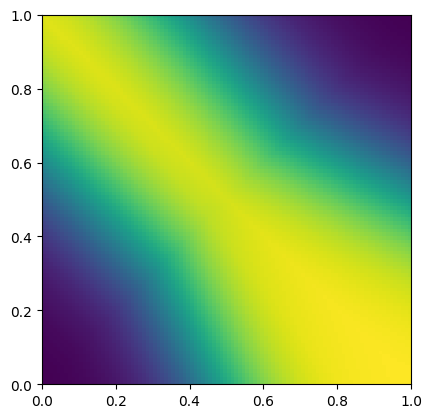

In [52]:
plot_decision_boundary(nn, n_points_per_dim=100)